# E-Learning Dropout Detection - Analyse Complète

**Objectif:** Prédire le décrochage des étudiants dans l'e-learning en utilisant:
- Logistic Regression (LR)
- Random Forest (RF)
- K-Nearest Neighbors (KNN)

**Dataset:** OULAD (Open University Learning Analytics Dataset)

## 1. Import des bibliothèques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 2. Chargement et exploration des données (EDA)

In [ ]:
# Chargement du dataset
df = pd.read_csv('students_dataset.csv')

print("=" * 70)
print("INFORMATIONS GÉNÉRALES SUR LE DATASET")
print("=" * 70)
print(f"Dimensions: {df.shape}")
print(f"\nNombre de colonnes: {df.shape[1]}")
print(f"Nombre d'observations: {df.shape[0]}")
print(f"\nPremières lignes:")
df.head(10)

INFORMATIONS GÉNÉRALES SUR LE DATASET
Dimensions: (32593, 58)

Nombre de colonnes: 58
Nombre d'observations: 32593

Premières lignes:


,code_module,code_presentation,id_student,num_of_prev_attempts,studied_credits,final_result,is_dropout,total_clicks,avg_clicks_per_day,std_clicks,...,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55<=,disability_Y
0,AAA,2013J,11391,0,240,Pass,0,934.0,4.765306,7.591224,...,False,False,False,False,False,False,True,False,True,False
1,AAA,2013J,28400,0,60,Pass,0,1435.0,3.337209,3.634240,...,False,False,False,False,False,False,False,True,False,False
2,AAA,2013J,30268,0,60,Withdrawn,1,281.0,3.697368,4.056336,...,True,False,False,False,False,False,False,True,False,True
3,AAA,2013J,31604,0,60,Pass,0,2158.0,3.254902,3.194577,...,False,False,True,False,False,False,False,True,False,False
4,AAA,2013J,32885,0,60,Pass,0,1034.0,2.937500,3.261895,...,False,False,True,False,False,False,False,False,False,False


In [3]:
# Informations sur les colonnes
print("\nINFORMATIONS SUR LES COLONNES:")
print("=" * 70)
df.info()


INFORMATIONS SUR LES COLONNES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 58 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   code_module                                    32593 non-null  object 
 1   code_presentation                              32593 non-null  object 
 2   id_student                                     32593 non-null  int64  
 3   num_of_prev_attempts                           32593 non-null  int64  
 4   studied_credits                                32593 non-null  int64  
 5   final_result                                   32593 non-null  object 
 6   is_dropout                                     32593 non-null  int64  
 7   total_clicks                                   29228 non-null  float64
 8   avg_clicks_per_day                             29228 non-null  float64
 9   std_clicks        

In [4]:
# Statistiques descriptives
print("\nSTATISTIQUES DESCRIPTIVES:")
print("=" * 70)
df.describe()


STATISTIQUES DESCRIPTIVES:


,id_student,num_of_prev_attempts,studied_credits,is_dropout,total_clicks,avg_clicks_per_day,std_clicks,max_clicks_day,active_days,first_activity_day,...,max_score,num_assessments,avg_submit_day,std_submit_day,banked_assessments,total_weight_submitted,date_registration,date_unregistration,is_unregistered,registration_duration
count,3.259300e+04,32593.000000,32593.000000,32593.000000,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000,29228.000000,...,25820.000000,25843.000000,25843.000000,25843.000000,25843.000000,25843.000000,32548.000000,10072.000000,32593.000000,10033.000000
mean,7.066877e+05,0.163225,79.758691,0.311601,1355.039654,3.268088,5.405344,53.135281,61.862563,-8.224374,...,86.544191,6.722865,98.174340,55.328356,0.073869,85.760825,-69.411300,49.757645,0.309023,128.797568
std,5.491673e+05,0.479758,41.071900,0.463155,1733.546045,1.226142,5.120450,95.449179,54.027412,13.113730,...,17.104197,3.773957,43.101347,27.898377,0.599447,63.189622,49.260522,82.460890,0.462098,85.694853
min,3.733000e+03,0.000000,30.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-25.000000,...,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,-322.000000,-365.000000,0.000000,0.000000
25%,5.085730e+05,0.000000,60.000000,0.000000,260.750000,2.364436,2.512480,16.000000,18.000000,-17.000000,...,80.000000,4.000000,67.142857,41.500229,0.000000,25.000000,-100.000000,-2.000000,0.000000,57.000000
50%,5.903100e+05,0.000000,60.000000,0.000000,739.500000,3.080000,4.257789,34.000000,47.000000,-10.000000,...,92.000000,7.000000,108.600000,61.765012,0.000000,100.000000,-57.000000,27.000000,0.000000,117.000000
75%,6.444530e+05,0.000000,120.000000,1.000000,1770.000000,3.997973,7.241985,72.000000,92.000000,-4.000000,...,100.000000,10.000000,125.714286,76.684887,0.000000,100.000000,-29.000000,109.000000,1.000000,186.000000
max,2.716795e+06,6.000000,655.000000,1.000000,24139.000000,20.028933,309.454738,6977.000000,286.000000,238.000000,...,100.000000,14.000000,351.600000,403.757972,12.000000,200.000000,167.000000,444.000000,1.000000,531.000000


### 2.1 Analyse de la variable cible (is_dropout)


DISTRIBUTION DE LA VARIABLE CIBLE (is_dropout):
Non-dropout (0): 22437 (68.84%)
Dropout (1): 10156 (31.16%)

Ratio de déséquilibre: 2.21:1


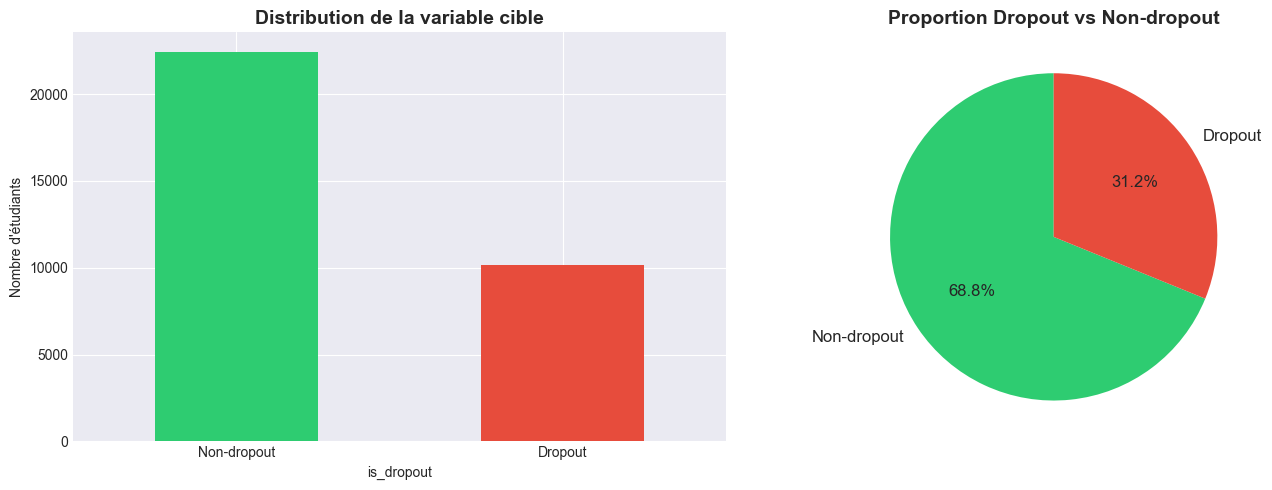

In [5]:
# Distribution de la variable cible
print("\nDISTRIBUTION DE LA VARIABLE CIBLE (is_dropout):")
print("=" * 70)
target_counts = df['is_dropout'].value_counts()
target_pct = df['is_dropout'].value_counts(normalize=True) * 100

print(f"Non-dropout (0): {target_counts[0]} ({target_pct[0]:.2f}%)")
print(f"Dropout (1): {target_counts[1]} ({target_pct[1]:.2f}%)")
print(f"\nRatio de déséquilibre: {target_counts[0] / target_counts[1]:.2f}:1")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribution de la variable cible', fontsize=14, fontweight='bold')
axes[0].set_xlabel('is_dropout')
axes[0].set_ylabel('Nombre d\'étudiants')
axes[0].set_xticklabels(['Non-dropout', 'Dropout'], rotation=0)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(target_counts, labels=['Non-dropout', 'Dropout'], autopct='%1.1f%%', 
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Proportion Dropout vs Non-dropout', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.2 Analyse des valeurs manquantes


VALEURS MANQUANTES:
               Colonne  Valeurs manquantes  Pourcentage
 registration_duration               22560    69.217317
   date_unregistration               22521    69.097659
             min_score                6773    20.780536
             max_score                6773    20.780536
             avg_score                6773    20.780536
    banked_assessments                6750    20.709968
        std_submit_day                6750    20.709968
total_weight_submitted                6750    20.709968
             std_score                6750    20.709968
        avg_submit_day                6750    20.709968
       num_assessments                6750    20.709968
          total_clicks                3365    10.324303
    avg_clicks_per_day                3365    10.324303
           active_days                3365    10.324303
        max_clicks_day                3365    10.324303
            std_clicks                3365    10.324303
       click_intensity     

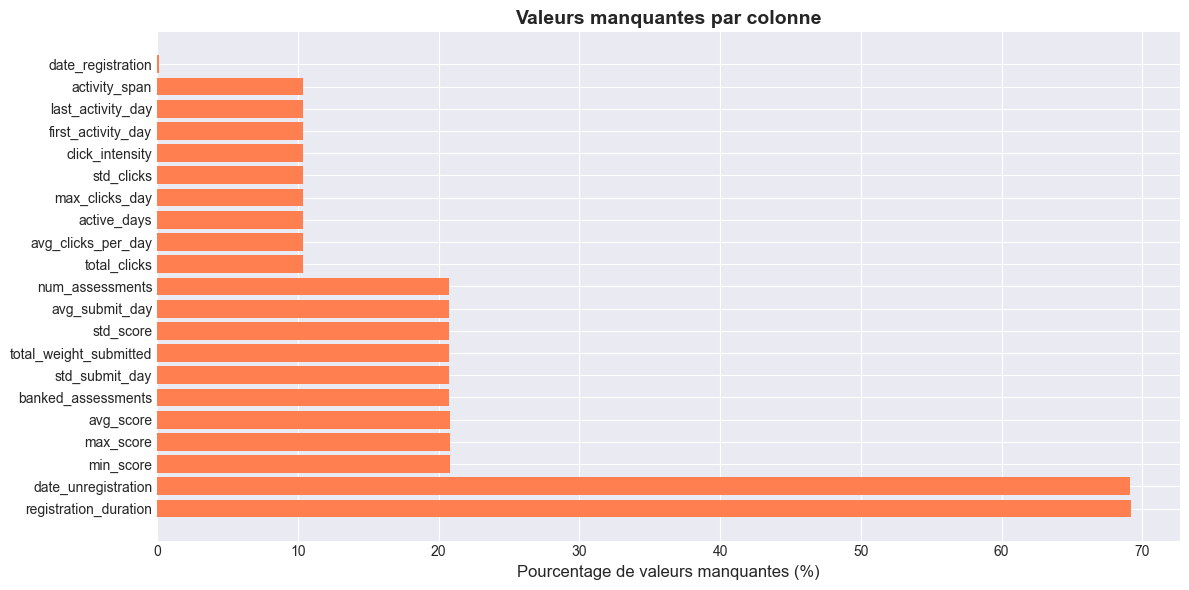

In [6]:
# Valeurs manquantes
print("\nVALEURS MANQUANTES:")
print("=" * 70)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Valeurs manquantes': missing.values,
    'Pourcentage': missing_pct.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
    
    # Visualisation
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df['Colonne'], missing_df['Pourcentage'], color='coral')
    plt.xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    plt.title('Valeurs manquantes par colonne', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Aucune valeur manquante détectée!")

### 2.3 Analyse des features numériques

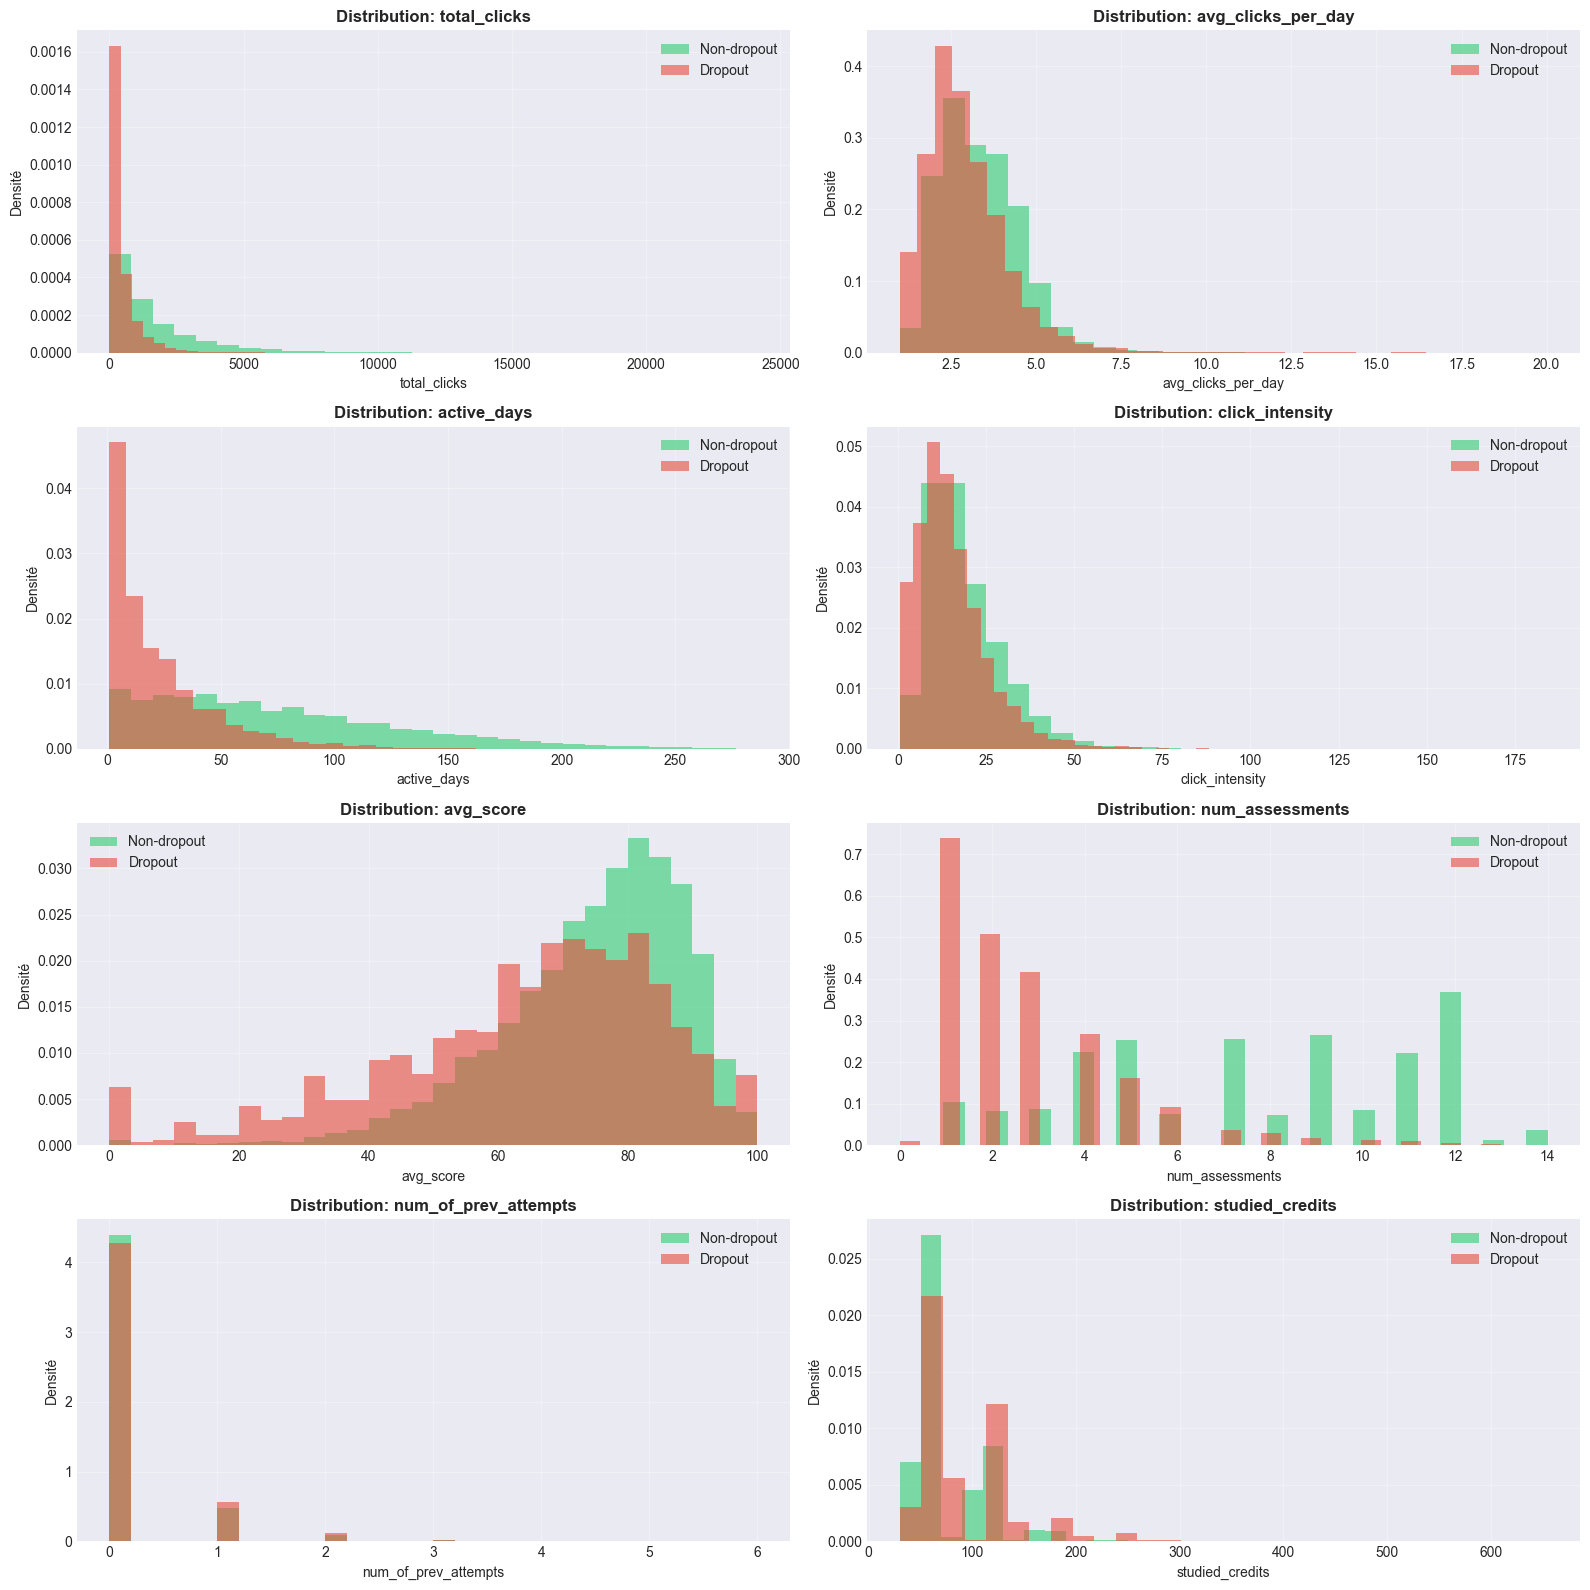

In [7]:
# Sélection des features importantes pour la visualisation
numeric_features = ['total_clicks', 'avg_clicks_per_day', 'active_days', 'click_intensity',
                   'avg_score', 'num_assessments', 'num_of_prev_attempts', 'studied_credits']

# Distributions des features numériques par classe
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.ravel()

for idx, col in enumerate(numeric_features):
    if col in df.columns:
        # Séparer par classe
        dropout = df[df['is_dropout'] == 1][col].dropna()
        non_dropout = df[df['is_dropout'] == 0][col].dropna()
        
        axes[idx].hist(non_dropout, bins=30, alpha=0.6, label='Non-dropout', color='#2ecc71', density=True)
        axes[idx].hist(dropout, bins=30, alpha=0.6, label='Dropout', color='#e74c3c', density=True)
        axes[idx].set_title(f'Distribution: {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Densité')
        axes[idx].legend()
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 2.4 Matrice de corrélation

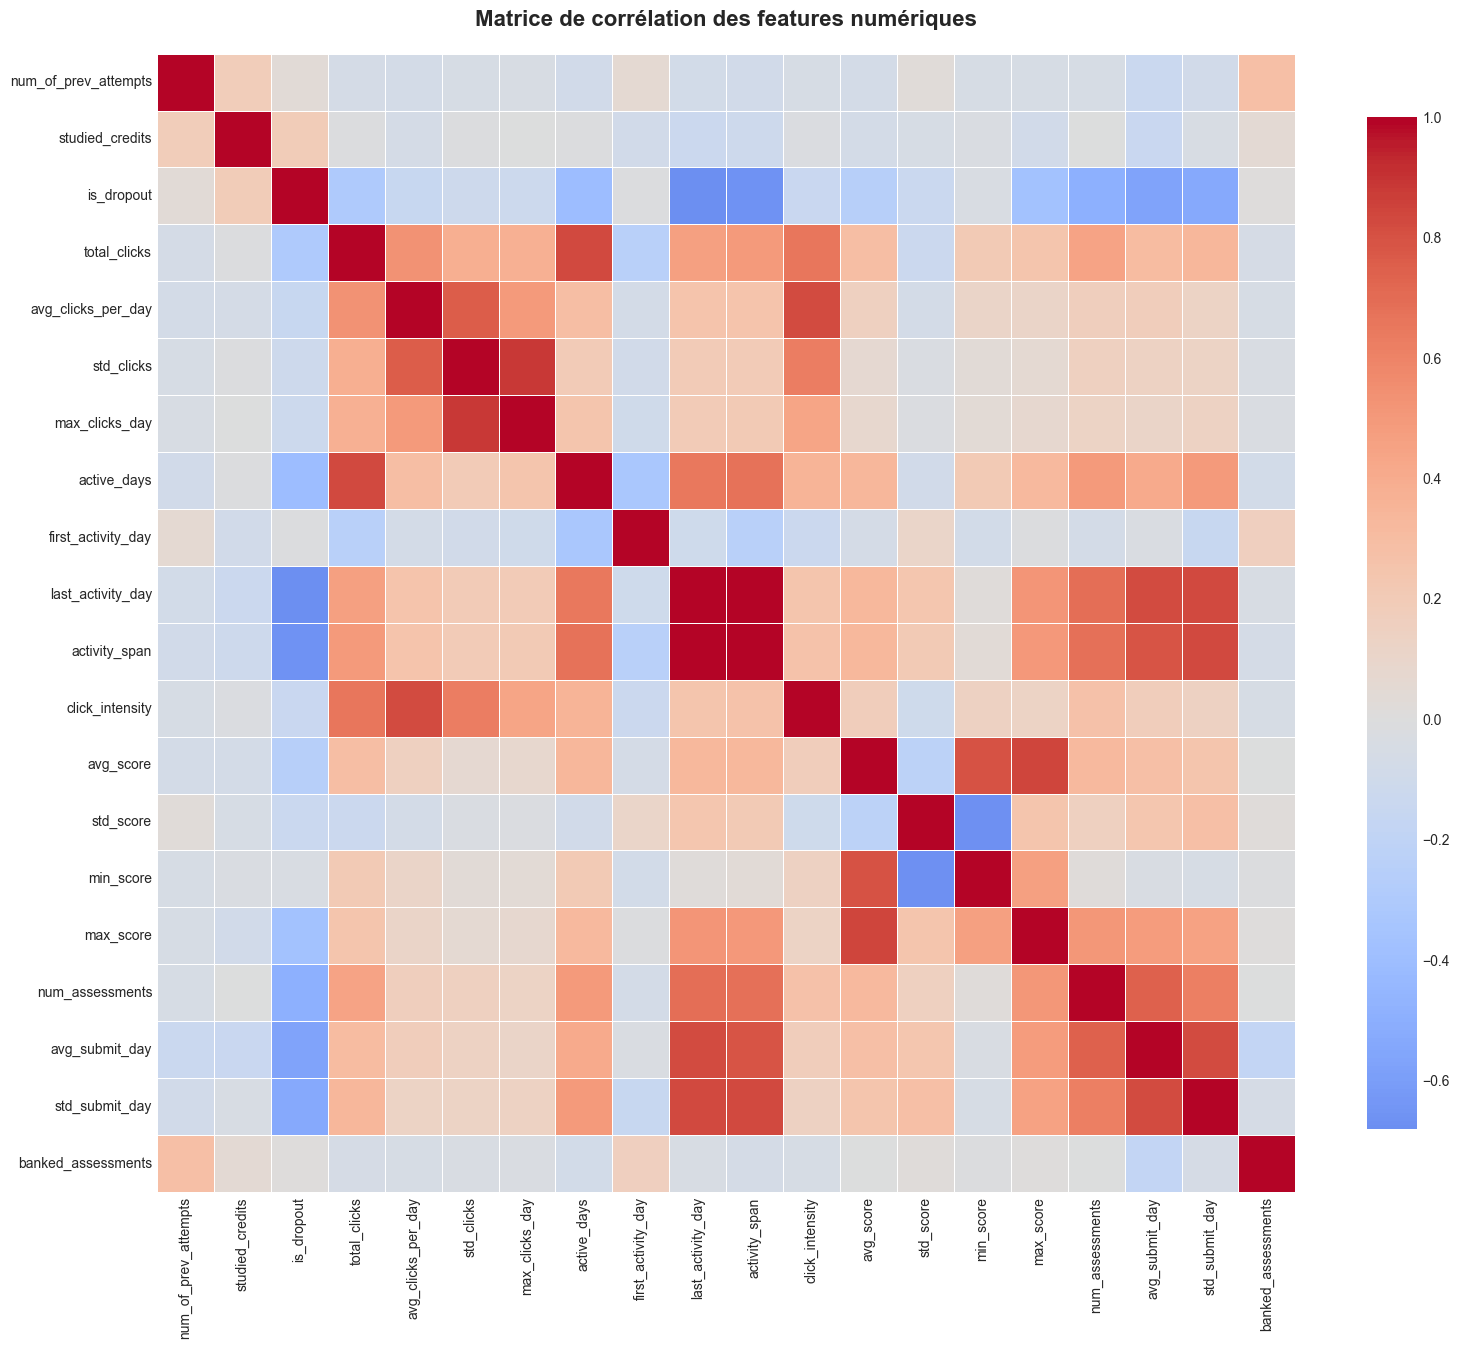


TOP 10 CORRÉLATIONS AVEC is_dropout:
is_dropout              1.000000
is_unregistered         0.992707
studied_credits         0.191191
num_of_prev_attempts    0.032903
banked_assessments      0.014121
first_activity_day     -0.007257
min_score              -0.032994
std_clicks             -0.114922
max_clicks_day         -0.121880
std_score              -0.140169
click_intensity        -0.146155


In [8]:
# Matrice de corrélation pour les features numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Enlever les colonnes identifiantes
id_cols = ['id_student', 'date_registration', 'date_unregistration', 'registration_duration']
numeric_cols = [col for col in numeric_cols if col not in id_cols]

# Limiter à 20 features pour la lisibilité
selected_cols = numeric_cols[:20]

plt.figure(figsize=(16, 14))
correlation_matrix = df[selected_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matrice de corrélation des features numériques', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top corrélations avec is_dropout
print("\nTOP 10 CORRÉLATIONS AVEC is_dropout:")
print("=" * 70)
target_corr = df[numeric_cols].corr()['is_dropout'].sort_values(ascending=False)
print(target_corr.head(11).to_string())  # 11 car is_dropout est inclus

## 3. Preprocessing des données

### 3.1 Préparation des features

In [9]:
print("\nPRÉPARATION DES DONNÉES:")
print("=" * 70)

# Séparation X et y
# Supprimer les colonnes non pertinentes pour la prédiction
cols_to_drop = ['id_student', 'code_module', 'code_presentation', 'final_result', 
                'date_registration', 'date_unregistration', 'is_dropout']

X = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
y = df['is_dropout']

print(f"Dimensions de X: {X.shape}")
print(f"Dimensions de y: {y.shape}")
print(f"\nNombre de features: {X.shape[1]}")
print(f"\nFeatures utilisées:")
print(X.columns.tolist())


PRÉPARATION DES DONNÉES:
Dimensions de X: (32593, 51)
Dimensions de y: (32593,)

Nombre de features: 51

Features utilisées:
['num_of_prev_attempts', 'studied_credits', 'total_clicks', 'avg_clicks_per_day', 'std_clicks', 'max_clicks_day', 'active_days', 'first_activity_day', 'last_activity_day', 'activity_span', 'click_intensity', 'avg_score', 'std_score', 'min_score', 'max_score', 'num_assessments', 'avg_submit_day', 'std_submit_day', 'banked_assessments', 'total_weight_submitted', 'is_unregistered', 'registration_duration', 'gender_M', 'region_East Midlands Region', 'region_Ireland', 'region_London Region', 'region_North Region', 'region_North Western Region', 'region_Scotland', 'region_South East Region', 'region_South Region', 'region_South West Region', 'region_Wales', 'region_West Midlands Region', 'region_Yorkshire Region', 'highest_education_HE Qualification', 'highest_education_Lower Than A Level', 'highest_education_No Formal quals', 'highest_education_Post Graduate Qualific

### 3.2 Gestion des valeurs manquantes

In [10]:
# Imputation des valeurs manquantes avec la médiane pour les features numériques
print("\nIMPUTATION DES VALEURS MANQUANTES:")
print("=" * 70)

# Pour les étudiants sans activité VLE, on met 0
vle_cols = ['total_clicks', 'avg_clicks_per_day', 'std_clicks', 'max_clicks_day',
            'active_days', 'first_activity_day', 'last_activity_day', 'activity_span', 'click_intensity']

for col in vle_cols:
    if col in X.columns:
        X[col] = X[col].fillna(0)
        print(f"  - {col}: rempli avec 0")

# Pour les scores d'assessments, on utilise la médiane
assessment_cols = ['avg_score', 'std_score', 'min_score', 'max_score', 
                  'num_assessments', 'avg_submit_day', 'std_submit_day',
                  'banked_assessments', 'total_weight_submitted']

for col in assessment_cols:
    if col in X.columns:
        median_val = X[col].median()
        X[col] = X[col].fillna(median_val)
        print(f"  - {col}: rempli avec médiane ({median_val:.2f})")

# Pour registration_duration, on remplace par 0 (ou médiane)
if 'registration_duration' in X.columns:
    X['registration_duration'] = X['registration_duration'].fillna(0)
    print("  - registration_duration: rempli avec 0")

# Pour toute autre colonne numérique restante
numeric_cols = X.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if X[col].isnull().sum() > 0:
        median_val = X[col].median()
        X[col] = X[col].fillna(median_val)
        print(f"  - {col} (restant): rempli avec médiane ({median_val:.2f})")

# Vérification
print(f"\nValeurs manquantes restantes: {X.isnull().sum().sum()}")


IMPUTATION DES VALEURS MANQUANTES:
  - total_clicks: rempli avec 0
  - avg_clicks_per_day: rempli avec 0
  - std_clicks: rempli avec 0
  - max_clicks_day: rempli avec 0
  - active_days: rempli avec 0
  - first_activity_day: rempli avec 0
  - last_activity_day: rempli avec 0
  - activity_span: rempli avec 0
  - click_intensity: rempli avec 0
  - avg_score: rempli avec médiane (76.00)
  - std_score: rempli avec médiane (11.06)
  - min_score: rempli avec médiane (60.00)
  - max_score: rempli avec médiane (92.00)
  - num_assessments: rempli avec médiane (7.00)
  - avg_submit_day: rempli avec médiane (108.60)
  - std_submit_day: rempli avec médiane (61.77)
  - banked_assessments: rempli avec médiane (0.00)
  - total_weight_submitted: rempli avec médiane (100.00)
  - registration_duration: rempli avec 0

Valeurs manquantes restantes: 0


### 3.3 Split train/test

In [11]:
# Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nSPLIT TRAIN/TEST:")
print("=" * 70)
print(f"Training set: {X_train.shape[0]} observations")
print(f"Test set: {X_test.shape[0]} observations")
print(f"\nDistribution dans le train set:")
print(f"  - Non-dropout: {(y_train == 0).sum()} ({(y_train == 0).sum() / len(y_train) * 100:.2f}%)")
print(f"  - Dropout: {(y_train == 1).sum()} ({(y_train == 1).sum() / len(y_train) * 100:.2f}%)")
print(f"\nDistribution dans le test set:")
print(f"  - Non-dropout: {(y_test == 0).sum()} ({(y_test == 0).sum() / len(y_test) * 100:.2f}%)")
print(f"  - Dropout: {(y_test == 1).sum()} ({(y_test == 1).sum() / len(y_test) * 100:.2f}%)")


SPLIT TRAIN/TEST:
Training set: 26074 observations
Test set: 6519 observations

Distribution dans le train set:
  - Non-dropout: 17949 (68.84%)
  - Dropout: 8125 (31.16%)

Distribution dans le test set:
  - Non-dropout: 4488 (68.84%)
  - Dropout: 2031 (31.16%)


### 3.4 Normalisation des features

In [12]:
# Normalisation avec StandardScaler
print("\nNORMALISATION DES FEATURES:")
print("=" * 70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Moyenne avant normalisation (train): {X_train.mean().mean():.4f}")
print(f"Moyenne après normalisation (train): {X_train_scaled.mean():.4f}")
print(f"\nÉcart-type avant normalisation (train): {X_train.std().mean():.4f}")
print(f"Écart-type après normalisation (train): {X_train_scaled.std():.4f}")

print("\n✓ Normalisation terminée!")


NORMALISATION DES FEATURES:
Moyenne avant normalisation (train): 44.5372
Moyenne après normalisation (train): 0.0000

Écart-type avant normalisation (train): 47.0676
Écart-type après normalisation (train): 1.0000

✓ Normalisation terminée!


### 3.5 Gestion du déséquilibre de classes avec SMOTE

In [13]:
# Application de SMOTE pour gérer le déséquilibre
print("\nAPPLICATION DE SMOTE:")
print("=" * 70)

print(f"Avant SMOTE:")
print(f"  - Total: {len(y_train)}")
print(f"  - Non-dropout: {(y_train == 0).sum()}")
print(f"  - Dropout: {(y_train == 1).sum()}")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nAprès SMOTE:")
print(f"  - Total: {len(y_train_balanced)}")
print(f"  - Non-dropout: {(y_train_balanced == 0).sum()}")
print(f"  - Dropout: {(y_train_balanced == 1).sum()}")

print("\n✓ Dataset équilibré!")


APPLICATION DE SMOTE:
Avant SMOTE:
  - Total: 26074
  - Non-dropout: 17949
  - Dropout: 8125

Après SMOTE:
  - Total: 35898
  - Non-dropout: 17949
  - Dropout: 17949

✓ Dataset équilibré!


## 4. Implémentation manuelle des algorithmes

### 4.1 Logistic Regression (implémentation manuelle)

In [14]:
class LogisticRegressionManual:
    """
    Implémentation manuelle de la Régression Logistique
    avec descente de gradient.
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, verbose=True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.losses = []
    
    def sigmoid(self, z):
        """Fonction sigmoïde"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip pour éviter overflow
    
    def compute_loss(self, y_true, y_pred):
        """Calcul de la log-loss (cross-entropy)"""
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y):
        """Entraînement du modèle"""
        n_samples, n_features = X.shape
        
        # Initialisation des poids
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Descente de gradient
        for iteration in range(self.n_iterations):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Calcul du gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Mise à jour des poids
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calcul de la loss
            loss = self.compute_loss(y, y_predicted)
            self.losses.append(loss)
            
            if self.verbose and (iteration + 1) % 100 == 0:
                print(f"Iteration {iteration + 1}/{self.n_iterations}, Loss: {loss:.4f}")
    
    def predict_proba(self, X):
        """Prédiction des probabilités"""
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Prédiction des classes"""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

print("✓ Classe LogisticRegressionManual créée!")

✓ Classe LogisticRegressionManual créée!


### 4.2 Random Forest (implémentation manuelle)

In [15]:
class DecisionTreeManual:
    """
    Implémentation manuelle d'un arbre de décision pour classification binaire
    """
    
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None
    
    def gini_impurity(self, y):
        """Calcul de l'impureté Gini"""
        if len(y) == 0:
            return 0
        p1 = np.sum(y == 1) / len(y)
        p0 = 1 - p1
        return 1 - (p0**2 + p1**2)
    
    def split_data(self, X, y, feature_idx, threshold):
        """Séparation des données selon une feature et un seuil"""
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]
    
    def find_best_split(self, X, y, n_features):
        """Trouve le meilleur split (feature + threshold)"""
        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        
        # Sélection aléatoire de features (pour Random Forest)
        feature_indices = np.random.choice(X.shape[1], n_features, replace=False)
        
        for feature_idx in feature_indices:
            thresholds = np.unique(X[:, feature_idx])
            
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self.split_data(X, y, feature_idx, threshold)
                
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                
                # Calcul du Gini pondéré
                n = len(y)
                gini = (len(y_left) / n) * self.gini_impurity(y_left) + \
                       (len(y_right) / n) * self.gini_impurity(y_right)
                
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def build_tree(self, X, y, depth=0):
        """Construction récursive de l'arbre"""
        n_samples, n_features = X.shape
        n_features_to_use = int(np.sqrt(n_features))  # Pour Random Forest
        
        # Conditions d'arrêt
        if depth >= self.max_depth or n_samples < self.min_samples_split or len(np.unique(y)) == 1:
            # Feuille: retourner la classe majoritaire
            leaf_value = 1 if np.sum(y == 1) > np.sum(y == 0) else 0
            return {'leaf': True, 'value': leaf_value}
        
        # Trouver le meilleur split
        best_feature, best_threshold = self.find_best_split(X, y, n_features_to_use)
        
        if best_feature is None:
            leaf_value = 1 if np.sum(y == 1) > np.sum(y == 0) else 0
            return {'leaf': True, 'value': leaf_value}
        
        # Split des données
        X_left, X_right, y_left, y_right = self.split_data(X, y, best_feature, best_threshold)
        
        # Construction récursive des sous-arbres
        left_subtree = self.build_tree(X_left, y_left, depth + 1)
        right_subtree = self.build_tree(X_right, y_right, depth + 1)
        
        return {
            'leaf': False,
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }
    
    def fit(self, X, y):
        """Entraînement de l'arbre"""
        self.tree = self.build_tree(X, y)
    
    def predict_sample(self, x, tree):
        """Prédiction pour un seul échantillon"""
        if tree['leaf']:
            return tree['value']
        
        if x[tree['feature']] <= tree['threshold']:
            return self.predict_sample(x, tree['left'])
        else:
            return self.predict_sample(x, tree['right'])
    
    def predict(self, X):
        """Prédiction pour plusieurs échantillons"""
        return np.array([self.predict_sample(x, self.tree) for x in X])


class RandomForestManual:
    """
    Implémentation manuelle de Random Forest
    """
    
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, verbose=True):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.verbose = verbose
        self.trees = []
    
    def bootstrap_sample(self, X, y):
        """Création d'un échantillon bootstrap"""
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y.iloc[indices].values if hasattr(y, 'iloc') else y[indices]
    
    def fit(self, X, y):
        """Entraînement de la forêt"""
        self.trees = []
        
        for i in range(self.n_trees):
            # Créer un arbre
            tree = DecisionTreeManual(max_depth=self.max_depth, 
                                     min_samples_split=self.min_samples_split)
            
            # Bootstrap sampling
            X_sample, y_sample = self.bootstrap_sample(X, y)
            
            # Entraîner l'arbre
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            
            if self.verbose and (i + 1) % 10 == 0:
                print(f"Arbre {i + 1}/{self.n_trees} entraîné")
    
    def predict(self, X):
        """Prédiction par vote majoritaire"""
        # Prédictions de chaque arbre
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        
        # Vote majoritaire
        final_preds = np.array([np.bincount(tree_preds[:, i]).argmax() 
                               for i in range(X.shape[0])])
        return final_preds

print("✓ Classes DecisionTreeManual et RandomForestManual créées!")

✓ Classes DecisionTreeManual et RandomForestManual créées!


### 4.3 K-Nearest Neighbors (implémentation manuelle)

In [16]:
class KNNManual:
    """
    Implémentation manuelle de K-Nearest Neighbors
    """
    
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def euclidean_distance(self, x1, x2):
        """Calcul de la distance euclidienne"""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def fit(self, X, y):
        """Stockage des données d'entraînement"""
        self.X_train = X
        self.y_train = y.values if hasattr(y, 'values') else y
    
    def predict_sample(self, x):
        """Prédiction pour un seul échantillon"""
        # Calcul des distances avec tous les points d'entraînement
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Obtenir les indices des k plus proches voisins
        k_indices = np.argsort(distances)[:self.k]
        
        # Obtenir les labels des k plus proches voisins
        k_nearest_labels = self.y_train[k_indices]
        
        # Vote majoritaire
        most_common = np.bincount(k_nearest_labels.astype(int)).argmax()
        return most_common
    
    def predict(self, X):
        """Prédiction pour plusieurs échantillons"""
        predictions = [self.predict_sample(x) for x in X]
        return np.array(predictions)

print("✓ Classe KNNManual créée!")

✓ Classe KNNManual créée!


## 5. Entraînement et évaluation des modèles

### 5.1 Fonction d'évaluation

In [17]:
def evaluate_model(y_true, y_pred, model_name):
    """
    Évaluation complète d'un modèle
    """
    print("\n" + "=" * 70)
    print(f"ÉVALUATION: {model_name}")
    print("=" * 70)
    
    # Métriques
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\nMétriques de performance:")
    print(f"  - Accuracy:  {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall:    {recall:.4f}")
    print(f"  - F1-Score:  {f1:.4f}")
    
    # Matrice de confusion
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nMatrice de confusion:")
    print(cm)
    
    # Visualisation de la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-dropout', 'Dropout'],
                yticklabels=['Non-dropout', 'Dropout'])
    plt.title(f'Matrice de Confusion - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.tight_layout()
    plt.show()
    
    # Rapport de classification
    print(f"\nRapport de classification:")
    print(classification_report(y_true, y_pred, target_names=['Non-dropout', 'Dropout']))
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

print("✓ Fonction evaluate_model créée!")

✓ Fonction evaluate_model créée!


### 5.2 Entraînement - Logistic Regression


######################################################################
# LOGISTIC REGRESSION
######################################################################
Iteration 100/1000, Loss: 0.3068
Iteration 200/1000, Loss: 0.2249
Iteration 300/1000, Loss: 0.1819
Iteration 400/1000, Loss: 0.1533
Iteration 500/1000, Loss: 0.1324
Iteration 600/1000, Loss: 0.1166
Iteration 700/1000, Loss: 0.1041
Iteration 800/1000, Loss: 0.0942
Iteration 900/1000, Loss: 0.0860
Iteration 1000/1000, Loss: 0.0792


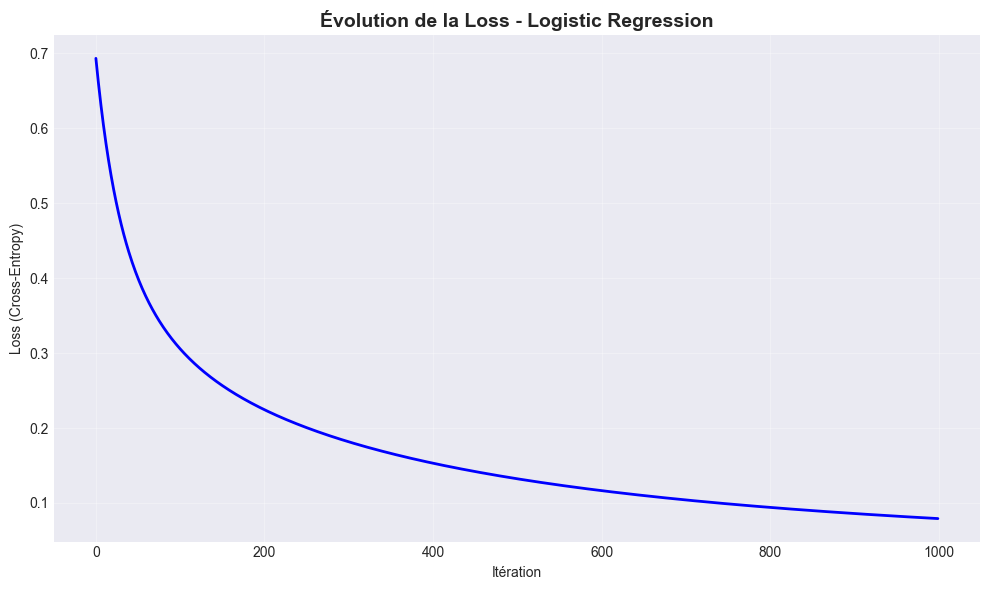


ÉVALUATION: Logistic Regression (Manual)

Métriques de performance:
  - Accuracy:  0.9903
  - Precision: 0.9735
  - Recall:    0.9961
  - F1-Score:  0.9847

Matrice de confusion:
[[4433   55]
 [   8 2023]]


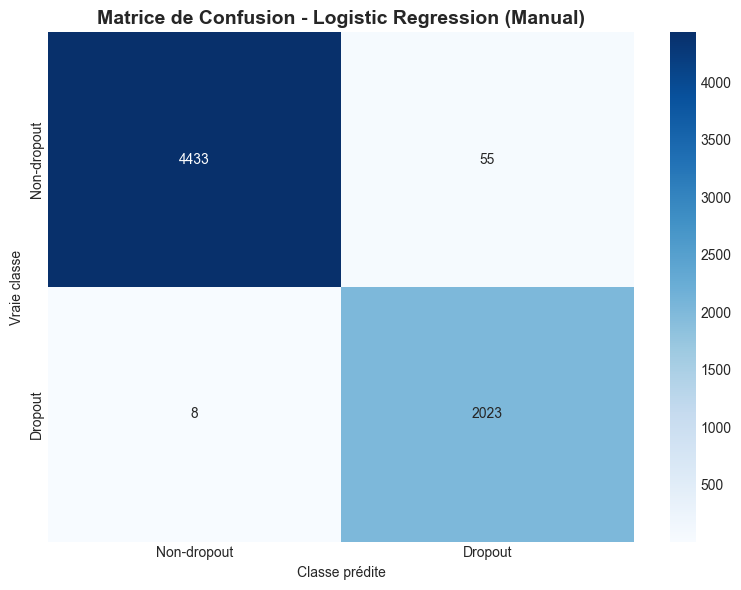


Rapport de classification:
              precision    recall  f1-score   support

 Non-dropout       1.00      0.99      0.99      4488
     Dropout       0.97      1.00      0.98      2031

    accuracy                           0.99      6519
   macro avg       0.99      0.99      0.99      6519
weighted avg       0.99      0.99      0.99      6519



In [18]:
print("\n" + "#" * 70)
print("# LOGISTIC REGRESSION")
print("#" * 70)

# Entraînement
lr_model = LogisticRegressionManual(learning_rate=0.01, n_iterations=1000, verbose=True)
lr_model.fit(X_train_balanced, y_train_balanced.values)

# Visualisation de la courbe de loss
plt.figure(figsize=(10, 6))
plt.plot(lr_model.losses, color='blue', linewidth=2)
plt.title('Évolution de la Loss - Logistic Regression', fontsize=14, fontweight='bold')
plt.xlabel('Itération')
plt.ylabel('Loss (Cross-Entropy)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Prédiction
y_pred_lr = lr_model.predict(X_test_scaled)

# Évaluation
lr_metrics = evaluate_model(y_test, y_pred_lr, "Logistic Regression (Manual)")

### 5.3 Entraînement - Random Forest

In [ ]:
print("\n" + "#" * 70)
print("# RANDOM FOREST")
print("#" * 70)

# Entraînement
rf_model = RandomForestManual(n_trees=50, max_depth=15, min_samples_split=5, verbose=True)
rf_model.fit(X_train_balanced, y_train_balanced)

# Prédiction
y_pred_rf = rf_model.predict(X_test_scaled)

# Évaluation
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest (Manual)")


######################################################################
# RANDOM FOREST
######################################################################
Arbre 10/50 entraîné


### 5.4 Entraînement - K-Nearest Neighbors

In [ ]:
print("\n" + "#" * 70)
print("# K-NEAREST NEIGHBORS")
print("#" * 70)

# Entraînement
knn_model = KNNManual(k=7)
knn_model.fit(X_train_balanced, y_train_balanced)

print(f"\nModèle KNN entraîné avec k={knn_model.k}")
print(f"Nombre d'exemples d'entraînement: {len(knn_model.X_train)}")

# Prédiction (sur un sous-ensemble pour accélérer)
print("\nPrédiction en cours... (cela peut prendre quelques minutes)")
y_pred_knn = knn_model.predict(X_test_scaled)

# Évaluation
knn_metrics = evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (Manual)")

## 6. Comparaison des modèles

In [ ]:
# Création du DataFrame de comparaison
comparison_df = pd.DataFrame({
    'Modèle': ['Logistic Regression', 'Random Forest', 'KNN'],
    'Accuracy': [lr_metrics['accuracy'], rf_metrics['accuracy'], knn_metrics['accuracy']],
    'Precision': [lr_metrics['precision'], rf_metrics['precision'], knn_metrics['precision']],
    'Recall': [lr_metrics['recall'], rf_metrics['recall'], knn_metrics['recall']],
    'F1-Score': [lr_metrics['f1'], rf_metrics['f1'], knn_metrics['f1']]
})

print("\n" + "=" * 70)
print("COMPARAISON DES MODÈLES")
print("=" * 70)
print(comparison_df.to_string(index=False))

# Visualisation de la comparaison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(comparison_df['Modèle'], comparison_df[metric], color=colors)
    ax.set_title(f'Comparaison - {metric}', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Déterminer le meilleur modèle
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Modèle']
best_f1 = comparison_df.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 MEILLEUR MODÈLE: {best_model} (F1-Score: {best_f1:.4f})")

## 7. Conclusions

### Résumé du projet

Dans ce notebook, nous avons:

1. **Exploré les données** (EDA):
   - Analysé la distribution de la variable cible (déséquilibre de classes)
   - Identifié les valeurs manquantes
   - Étudié les corrélations entre features

2. **Prétraité les données**:
   - Géré les valeurs manquantes (imputation)
   - Normalisé les features avec StandardScaler
   - Équilibré les classes avec SMOTE

3. **Implémenté manuellement** trois algorithmes:
   - **Logistic Regression**: avec descente de gradient
   - **Random Forest**: avec arbres de décision et bootstrap
   - **K-Nearest Neighbors**: avec distance euclidienne

4. **Évalué et comparé** les modèles:
   - Utilisé des métriques adaptées au déséquilibre de classes
   - Visualisé les performances avec matrices de confusion

### Points clés

- Le **déséquilibre de classes** (31% dropout vs 69% non-dropout) a été géré avec SMOTE
- Les **valeurs manquantes** dans les logs VLE et assessments ont été imputées
- La **normalisation** des features était cruciale pour LR et KNN
- Les implémentations manuelles permettent de comprendre le fonctionnement interne des algorithmes